# Session 4: Convolutional Neural Networks and Filters

This notebook contains structured tasks based on Session 4 materials.

**Instructions:**
- Do NOT use a separate `.py` file. Complete all tasks directly in this notebook.
- Keep your code clear and well-commented.
- For Visulaization, please use `%matplotlib inline`
- Submit your completed notebook by uploading it to your forked repository.

### ***DO NOT UPLOAD THE DATASET TO GITHUB as it's too large***
<hr>

## Task 1: Convolutional Filters on an Image
Apply several 2D filters (Sobel X, Sobel Y, Laplacian, and Sharpen) to an image and visualize the results side by side.

**Hint:**
- Use OpenCV (`cv2.filter2D`) or NumPy to apply kernels.
- Define common kernels (Sobel, Laplacian, Sharpen).
- Use `matplotlib.pyplot` to plot the original and filtered images.

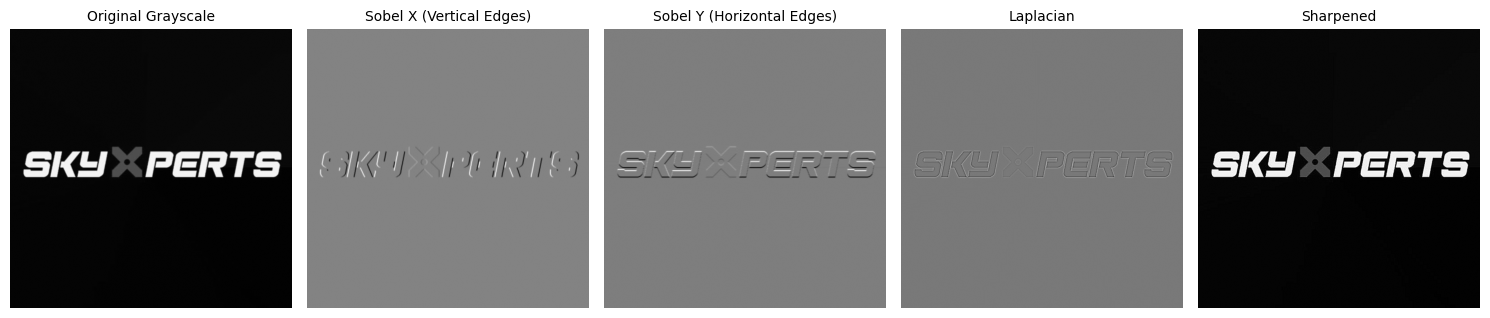

In [6]:
import cv2 as cv
import numpy as np
import sys
import matplotlib.pyplot as plt

# TODO: Load an image (use OpenCV or matplotlib)
path = './images/logo.png' 
img= cv.imread(path)

# TODO: Convert to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# TODO: Define Sobel, Laplacian, and Sharpen kernels
sobel_x_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], )

sobel_y_kernel = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
],)

laplacian_kernel = np.array([
    [ 0,  1,  0],
    [ 1, -4,  1],
    [ 0,  1,  0]
], )

sharpen_kernel = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
], )



# TODO: Apply each filter to the image
sobel_x = cv.filter2D(img_gray, cv.CV_16S, sobel_x_kernel)


sobel_y = cv.filter2D(img_gray, cv.CV_16S, sobel_y_kernel)


laplacian = cv.filter2D(img_gray, cv.CV_16S, laplacian_kernel)


sharpened = cv.filter2D(img_gray, -1, sharpen_kernel) 


# TODO: Plot results in a grid using matplotlib
plt.figure(figsize=(15, 6))

titles = ['Original Grayscale', 'Sobel X (Vertical Edges)', 'Sobel Y (Horizontal Edges)', 
          'Laplacian', 'Sharpened']
images = [img_gray, sobel_x, sobel_y, laplacian, sharpened]

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Task 2: Build a Simple CNN on FashionMNIST
Construct and train a small Convolutional Neural Network (CNN) on the FashionMNIST dataset.

**Hint:**
- Use `torchvision.datasets.FashionMNIST` for loading data.
- Define a small CNN with `nn.Conv2d`, `nn.ReLU`, `nn.MaxPool2d`, and `nn.Linear`.
- Train for a few epochs using an optimizer (e.g., Adam) and loss function (e.g., CrossEntropyLoss).
- Print training accuracy after each epoch.

In [ ]:
# TODO: Import torch, torchvision, and related libraries
# TODO: Load FashionMNIST dataset with transforms
# TODO: Define a simple CNN class with one conv layer and one fc layer
# TODO: Set up optimizer and loss function
# TODO: Implement a short training loop (2-3 epochs)

## Task 3: Visualize Feature Maps
Visualize feature maps produced by the first convolutional layer of your CNN.

**Hint:**
- Take a single image from the test set.
- Pass it through the first convolutional layer (`net.conv1`).
- Convert the output to NumPy and plot several channels as images.

In [ ]:
# TODO: Take one test image
# TODO: Forward pass through the first convolutional layer
# TODO: Convert feature maps to NumPy array
# TODO: Plot the first few feature maps in a grid

## Task 4: Haar Cascade Face Detection

Apply Haar Cascade classifiers for basic object detection (faces).

**Hint:**
- Use `cv2.CascadeClassifier` with a pre-trained XML file (e.g., `haarcascade_frontalface_default.xml`).
- Convert the input image to grayscale before detection.
- Use `detectMultiScale` to get bounding boxes.
- Draw rectangles on detected faces with `cv2.rectangle`.
- Visualize with Matplotlib.


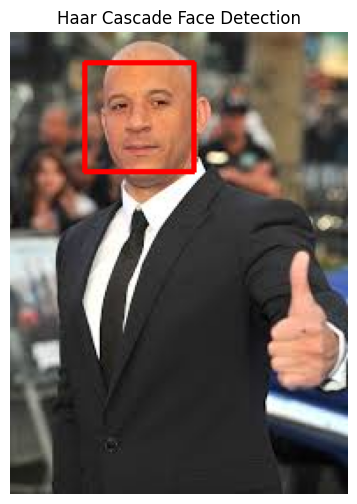

In [7]:
import cv2 as cv
import numpy as np
import sys
import matplotlib.pyplot as plt

# TODO: Load an image containing a face
path = './images/vin.jpg'
img = cv.imread(path)

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# TODO: Convert to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# TODO: Load Haar Cascade XML (frontal face) || cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

# TODO: Apply detectMultiScale to find faces
faces = face_cascade.detectMultiScale(
    img_gray, 
    scaleFactor=1.1, 
    minNeighbors=5, 
    minSize=(30, 30) 
)
# TODO: Draw bounding boxes on the original image
img_with_boxes = img_rgb.copy()
for (x, y, w, h) in faces:
    cv.rectangle(img_with_boxes, (x, y), (x + w, y + h), (255, 0, 0), 2)

# TODO: Display results with matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img_with_boxes)
plt.title('Haar Cascade Face Detection')
plt.axis('off')
plt.show()